In [1]:
### Celda para ejecutar en google Colab

from google.colab import drive
import os
drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/Multiples_anotadores/Pruebas/models'

os.chdir(root_path)

Mounted at /content/gdrive


In [2]:
#!pip install tf-nightly
from MA_pi_tanh_keras import *

In [3]:
database = 'bupa1' #['bupa1', 'breast-cancer-wisconsin1','pima-indians-diabetes1', 'ionosphere1', 'tic-tac-toe1', 'iris1', 'wine1', 'segmentation1']

sh_ind = loadmat('/content/gdrive/My Drive/Multiples_anotadores/data/shuffled_index_'+database+'.mat')['sh_ind']
data_path = '/content/gdrive/My Drive/Multiples_anotadores/data/' + database +'.mat' 
data = loadmat(data_path)
#heads = data['MAData'].dtype
X = data['MAData']['X'][0,0]
t = data['MAData']['t'][0,0]
Y = data['MAData']['Y1'][0,0]

if len(np.unique(Y))!=2:
  Y = Y - 1
  t = t - 1
  
acc = []
auc = []

i=5

Xtrain, Ytrain, ttrain, Xtest, Ytest, ttest = data_partitionMA(X,Y,t,sh_ind,0.7,i)
#Xtrain, Ytrain, ttrain = X, Y, t

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

R = Y.shape[1] 
N = X.shape[0]
N_train = Xtrain.shape[0]
P = X.shape[1]
K = np.unique(t).size

Xtrainf = np.concatenate((Xtrain, Ytrain),1)
Xtestf = np.concatenate((Xtest, Ytest),1)

model = Keras_MA_pi_kern(K=K, R=R, P=P, epochs=150, batch_size=min(256, N_train), 
                        validation_split=0, learning_rate=0.05, ratio_lin=0.7,
                        ratio=1.3, verbose=1, scale=1, RBFout=7,
                        l1=0.01, l2=0.01, w_init='PCdA', seed=100, optimizer='RMS', 
                        dropout=True)

model.fit(Xtrainf, ttrain)


#acc = np.mean(model.predict(Xtestf)==ttest.T)

#try:
#  auc = roc_auc_score(ook(ttest), model.predict_proba(Xtestf))
#except:
#  auc = 0.5



y_probas = np.stack([model.model(Xtestf[:,:P], training=True)[:,:K] # se activa training en True para que el Dropout se aplique
                     for sample in range(100)])

pred = np.mean(y_probas, axis=0)
#pred = np.mean([model.predict_proba(Xtestf) for sample in range(100)], axis=0)

acc = np.mean(np.argmax(pred, axis=1)==ttest.T)

try:
  auc = roc_auc_score(ook(ttest), pred)
except:
  auc = 0.5

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 1036.8486
Epoch 2/150
1/1 [==============================] - 0s 9ms/step - loss: 995.6692
Epoch 3/150
1/1 [==============================] - 0s 7ms/step - loss: 896.2771
Epoch 4/150
1/1 [==============================] - 0s 6ms/step - loss: 865.9967
Epoch 5/150
1/1 [==============================] - 0s 8ms/step - loss: 851.0785
Epoch 6/150
1/1 [==============================] - 0s 6ms/step - loss: 856.6497
Epoch 7/150
1/1 [==============================] - 0s 5ms/step - loss: 846.4020
Epoch 8/150
1/1 [==============================] - 0s 5ms/step - loss: 846.0988
Epoch 9/150
1/1 [==============================] - 0s 6ms/step - loss: 846.6570
Epoch 10/150
1/1 [==============================] - 0s 5ms/step - loss: 840.1113
Epoch 11/150
1/1 [==============================] - 0s 5ms/step - loss: 844.7037
Epoch 12/150
1/1 [==============================] - 0s 5ms/step - loss: 839.1595
Epoch 13/150
1/1 [===================

In [ ]:
# enc = OneHotEncoder()
# ymv = mode(Ytrain,1)[0]
# yb = enc.fit_transform(ymv).toarray()

# w_init = np.linalg.pinv(Xtrain).dot(yb)
# w2_init = np.linalg.pinv(Xtrain).dot((Ytrain==ymv).astype(int))

In [ ]:
# w2_init.shape

In [ ]:
acc

0.6407766990291263

In [ ]:
auc

0.6361111111111112

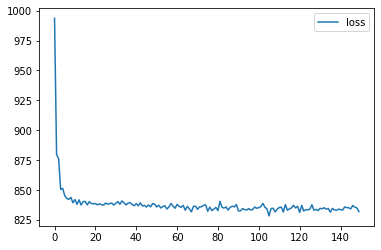

In [ ]:
model.plot_history_loss()

In [ ]:
ttest.T

array([[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]], dtype=uint8)

In [ ]:
#Yhat = model.predict(Xtestf)
#Yhat

In [ ]:
#model.score(Xtestf, ttest)

1.2598512867930343

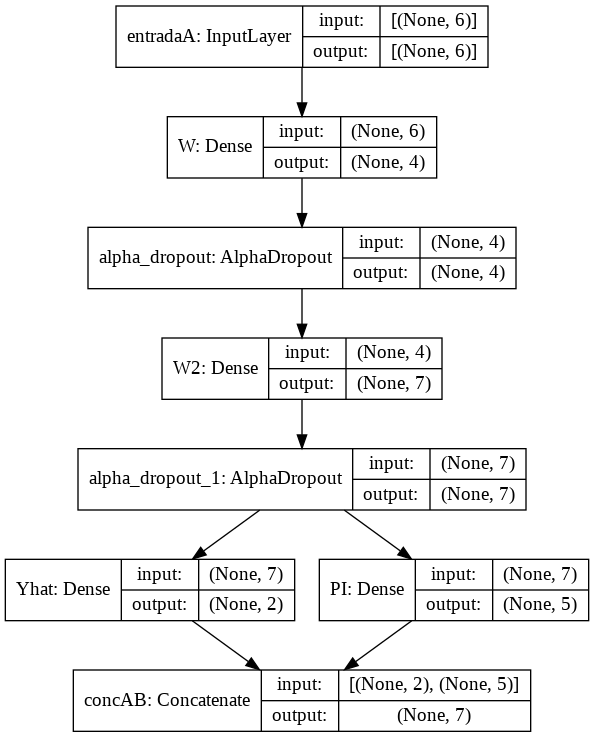

In [ ]:
tf.keras.utils.plot_model(model.model, show_shapes=True)

In [ ]:
model

Keras_MA_pi_kern(K=2, P=6, R=5, RBFout=7, batch_size=242, dropout=True,
                 epochs=150, l1=0.01, l2=0.01, learning_rate=0.05,
                 optimizer='RMS', ratio=1.3, ratio_lin=0.7, scale=1, seed=100,
                 validation_split=0, verbose=1, w_init='PCdA')